In [1]:
import glob
import re
import pandas
import time

In [2]:
parallel_log = 'parallel.log'
seq_log = 'sequential.log'

In [3]:
linepattern = r'n\: (\d{1,2}), epoch (\d{1,3}), loss: (.*), train top1:(.*) test top1:(.*)'

In [4]:
l = "n: 1, epoch 1, loss: 1.67680, train top1:37.852 test top1:40.180000686645506"
mm = re.search(linepattern, l)
mm.groups()

('1', '1', '1.67680', '37.852', '40.180000686645506')

In [5]:
line_field_names = [
    ('n', int),
    ('epoch', int),
    ('loss', float),
    ('train_acc', float),
    ('test_acc', float)
]

In [6]:
line_descriptor_dicts = []
with open(seq_log, 'r') as f:
    for line in f:
        match = re.search(linepattern, line)
        if match is not None:
            dd = {field_name: field_dtype(value) for (field_name, field_dtype), value
                         in zip(line_field_names, match.groups())}
            dd['type'] = 'sequential'
            line_descriptor_dicts.append(dd)
            
with open(parallel_log, 'r') as f:
    for line in f:
        match = re.search(linepattern, line)
        if match is not None:
            dd = {field_name: field_dtype(value) for (field_name, field_dtype), value
                         in zip(line_field_names, match.groups())}
            dd['type'] = 'parallel'
            line_descriptor_dicts.append(dd)
line_df = pandas.DataFrame.from_records(line_descriptor_dicts)

In [7]:
full_df = line_df

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(29.045,0.5,'Accuracy')

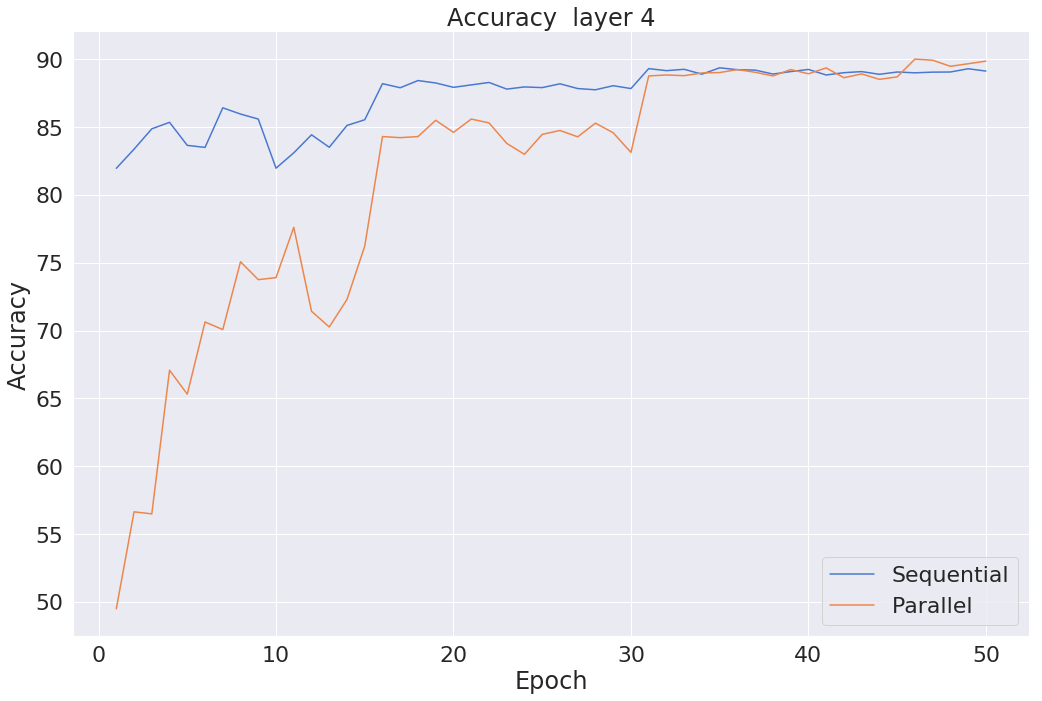

In [9]:
n=4
df = full_df[(full_df['n'] == n)]
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set(style="dark")
sns.set(font_scale=2)
# Plot the responses for different events and regions
g = sns.relplot(x="epoch", y='test_acc', kind="line",legend=False,
                height=10,aspect=1.5, palette="muted", #marker='o',markersize=10,
                hue='type',data=df)

plt.legend(['Sequential','Parallel'],loc='lower right')
plt.title('Accuracy  layer %d'%(n))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

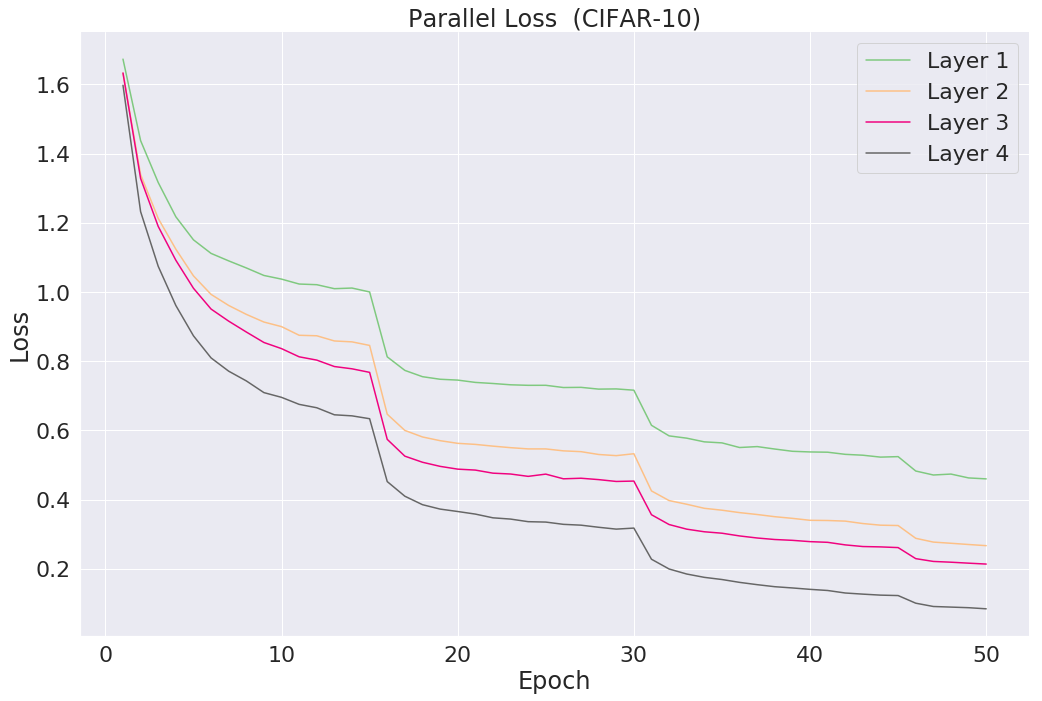

In [52]:
df = full_df[(full_df['type'] == 'parallel')]
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set(style="dark")
sns.set(font_scale=2)
# Plot the responses for different events and regions
g = sns.relplot(x="epoch", y='loss', kind="line",legend=False,
                height=10,aspect=1.5, palette='Accent', #marker='o',markersize=10,
                hue='n',data=df)

plt.legend(['Layer 1','Layer 2','Layer 3','Layer 4'],loc='upper right')
#plt.legend(['DGL+Replay (Async)',''],loc='lower right')
plt.title('Parallel Loss  (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('learning_curve_parallel.eps')

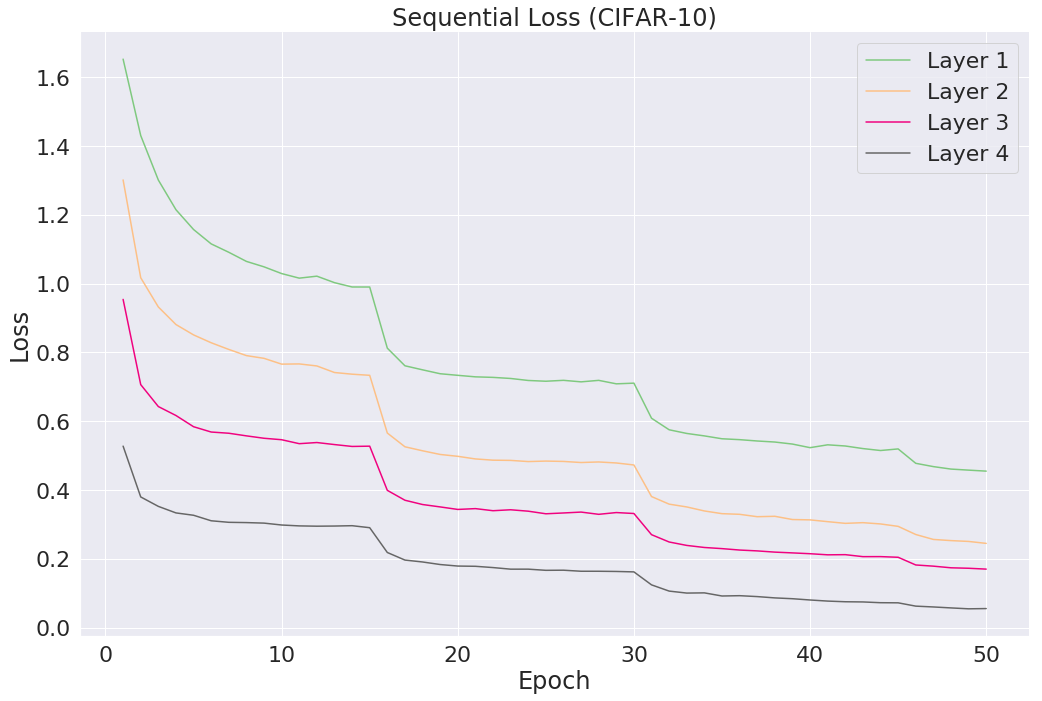

In [51]:
df = full_df[(full_df['type'] == 'sequential')]
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set(style="dark")
sns.set(font_scale=2)
# Plot the responses for different events and regions
g = sns.relplot(x="epoch", y='loss', kind="line",legend=False,
                height=10,aspect=1.5, palette='Accent',  #marker='o',markersize=10,
                hue='n',data=df)

plt.legend(['Layer 1','Layer 2','Layer 3','Layer 4'],loc='upper right')
plt.title('Sequential Loss (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('learning_curve_sequential.eps')

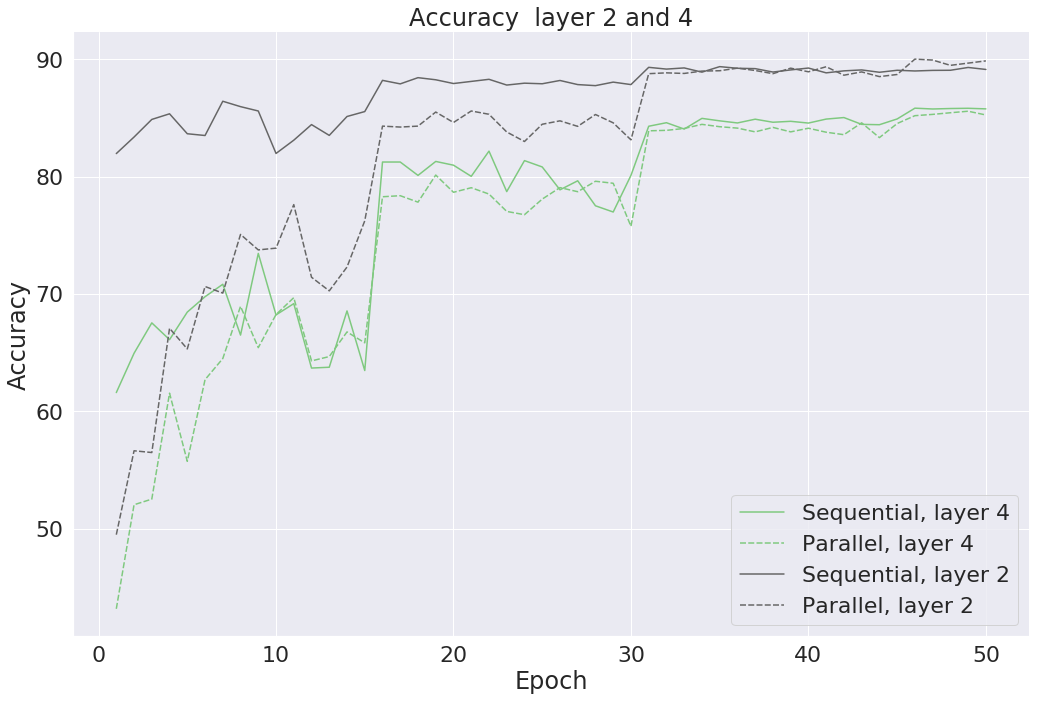

In [50]:
ns=[2,4]
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set(style="dark")
sns.set(font_scale=2)
#df = full_df[(full_df['n'] == n)]
df = full_df[full_df.n.isin(ns)]

# Plot the responses for different events and regions
g = sns.relplot(x="epoch", y='test_acc', kind="line",legend=False,
                    height=10,aspect=1.5, palette='Accent', #marker='o',markersize=10,
                    hue='n',data=df, style='type')

plt.legend(['Sequential, layer 4','Parallel, layer 4','Sequential, layer 2', 'Parallel, layer 2'],loc='lower right')
plt.title('Accuracy  layer 2 and 4')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('learning_curve_2_4.eps')